In [41]:
# Dependencies
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [42]:
# Load Datastet
df = yf.download('AAPL', start = '2020-01-01', end = '2025-01-01')
print(df.head())

/tmp/ipython-input-547137899.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start = '2020-01-01', end = '2025-01-01')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538513  72.598892  71.292304  71.545890  135480400
2020-01-03  71.833298  72.594063  71.608692  71.765674  146322800
2020-01-06  72.405693  72.444336  70.703027  70.954203  118387200
2020-01-07  72.065155  72.671348  71.845377  72.415345  108872000
2020-01-08  73.224403  73.526295  71.768079  71.768079  132079200


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Split first (stratify only if classification, otherwise remove)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# Extract shape info
samples, timesteps, features = X_train.shape

# Initialize scaler
sc = MinMaxScaler()

# Fit on training set (flattened), then transform
X_train_scaled = sc.fit_transform(X_train.reshape(samples, timesteps * features))
X_val_scaled = sc.transform(X_val.reshape(X_val.shape[0], timesteps * features))

# Reshape back to original 3D format
X_train = X_train_scaled.reshape(samples, timesteps, features)
X_val = X_val_scaled.reshape(X_val.shape[0], timesteps, features)


In [44]:
import numpy as np

# Parameters
window_size = 5

# Convert Close prices to NumPy array for faster slicing
close_prices = df['Close'].values

features = []
labels = []

for i in range(len(close_prices) - window_size):
    past_window = close_prices[i:i + window_size]
    current_price = past_window[-1]
    next_day_price = close_prices[i + window_size]

    features.append(past_window)
    labels.append(1 if next_day_price > current_price else 0)

# Convert to NumPy arrays
X = np.array(features)
y = np.array(labels)


In [45]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Extract X, y
X = np.array([x[0] for x in data], dtype=float).reshape(-1, window_size, 1)  # (samples, timesteps, features)
y = np.array([x[1] for x in data], dtype=int)

samples, timesteps, features = X.shape  # Unpacks correctly

# Flatten for scaling
X_flat = X.reshape(samples, timesteps * features)

# Scale
sc = MinMaxScaler()
X_scaled_flat = sc.fit_transform(X_flat)

# Reshape back to 3D
X = X_scaled_flat.reshape(samples, timesteps, features)



In [46]:
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (1252, 5, 1)
Labels shape: (1252,)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle = True
)

In [48]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(window_size,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

In [51]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5335 - loss: 0.6910 - val_accuracy: 0.5418 - val_loss: 0.6894
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5316 - loss: 0.6943 - val_accuracy: 0.5458 - val_loss: 0.6892
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5404 - loss: 0.6909 - val_accuracy: 0.5458 - val_loss: 0.6899
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5478 - loss: 0.6909 - val_accuracy: 0.5458 - val_loss: 0.6896
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5335 - loss: 0.6922 - val_accuracy: 0.5458 - val_loss: 0.6892
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4891 - loss: 0.6986 - val_accuracy: 0.5458 - val_loss: 0.6893
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5019 - loss: 0.6976 - val_accuracy: 0.5458 - val_loss: 0.6884
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5407 - loss: 0.6920 - val_accuracy: 0.5458 - val_loss

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print(cm)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[  0 121]
 [  0 130]]


In [53]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5199 - loss: 0.6916 
Test Accuracy: 51.79%


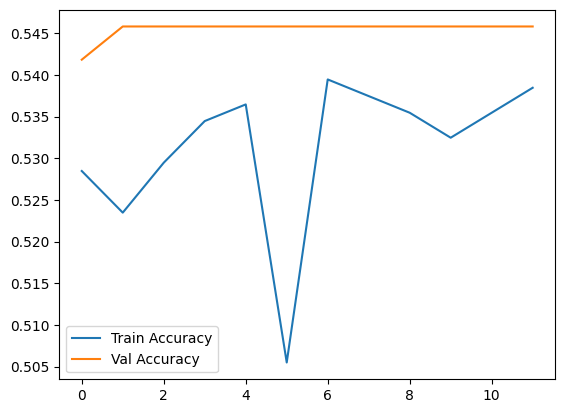

In [54]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

In [55]:
import numpy as np
print("Train:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Val:", dict(zip(*np.unique(y_val, return_counts=True))))

Train: {np.int64(0): np.int64(463), np.int64(1): np.int64(538)}
Val: {np.int64(0): np.int64(114), np.int64(1): np.int64(137)}


In [56]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(463), np.int64(1): np.int64(538)}
